In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

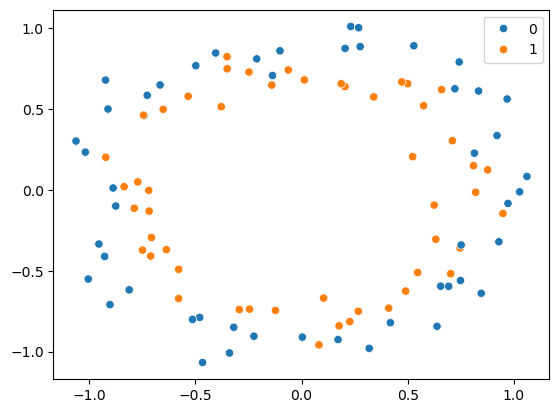

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [8]:
from keras.models import Sequential
from keras.layers import Input, Dense

model = Sequential()

# Use Input layer to specify the input shape
model.add(Input(shape=(2,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

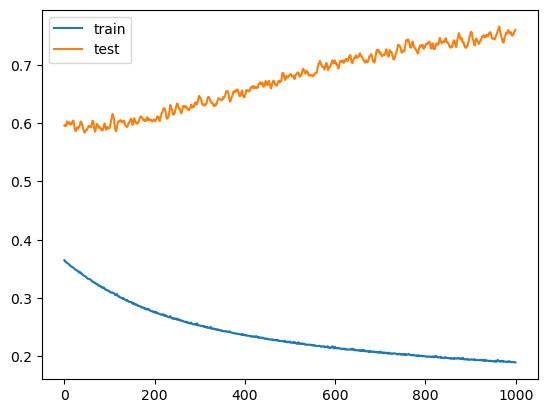

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 598us/step


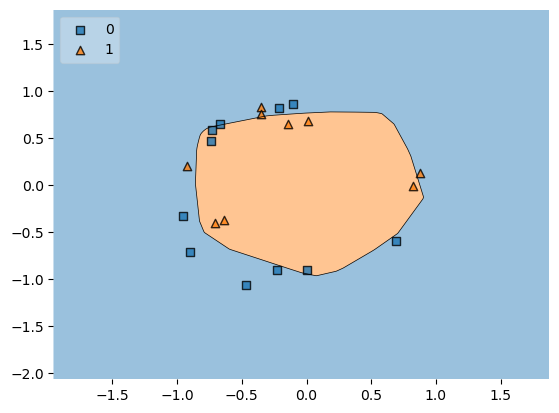

In [13]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

Early Stopping

In [14]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5609 - loss: 0.6728 - val_accuracy: 0.4000 - val_loss: 0.7195
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6180 - loss: 0.6691 - val_accuracy: 0.4000 - val_loss: 0.7201
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5672 - loss: 0.6759 - val_accuracy: 0.4000 - val_loss: 0.7195
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5570 - loss: 0.6754 - val_accuracy: 0.4000 - val_loss: 0.7200
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5633 - loss: 0.6729 - val_accuracy: 0.4000 - val_loss: 0.7204
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5609 - loss: 0.6716 - val_accuracy: 0.4000 - val_loss: 0.7211
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5648 - loss: 0.6703 - val_accuracy: 0.4000 - val_loss: 0.7213
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5797 - loss: 0.6671 - val_accuracy: 0.4000 - val

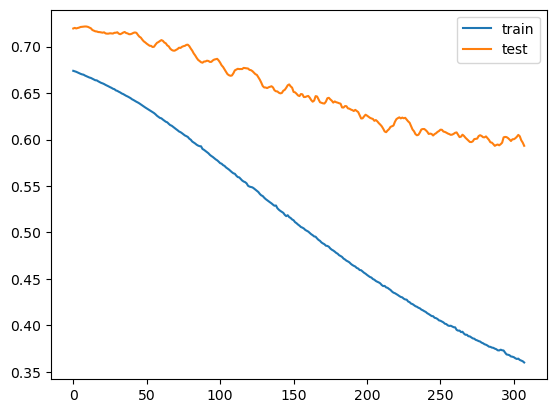

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 608us/step


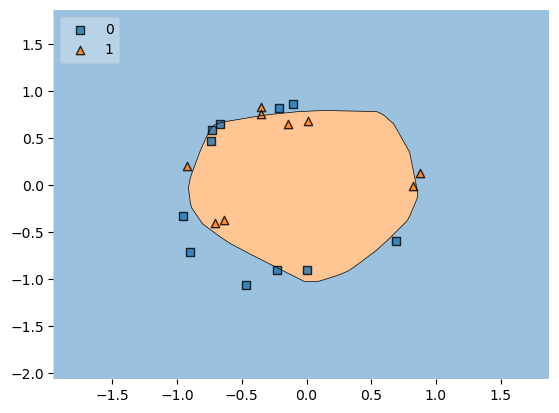

In [23]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()